# 0. Chargement du dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import sort_dataframeby_monthorweek as sd

#library used for visualizing missing data in datasets
import missingno as msno 

# Function for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 35)
df= pd.read_csv('hotel_bookings.csv', sep=',')

# 1. Exploration et préparation des données


In [41]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [24]:
# Afficher les informations sur le DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
#Nombre de lignes
print("Nombre de lignes :", df.shape[0], "\n")

#Nombre de colonnes
print("Nombre de colonnes :", df.shape[1], "\n")


Nombre de lignes : 119390 

Nombre de colonnes : 32 



In [26]:
# Affichage des colonnes
print(df.columns, "\n")

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object') 



# 2. Nettoyage des Données

## 2.1. Identification et suppresion des doublons

In [60]:
# Lignes en double
doublons = df.duplicated().sum()
print("\nNombre de lignes en double (à l'exclusion de l'ID):", doublons)

# 31994


Nombre de lignes en double (à l'exclusion de l'ID): 31994


In [61]:
# Supprimer les ligne en double
df = df.drop_duplicates()

## 2.2. Gestion des Valeurs Nulles

### 2.2.1. Identifier les valeurs nulles et leur pourcentage


In [62]:
val_null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
val_null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.004577
babies                                    0                0.000000
meal                                      0                0.000000
country                                 452                0.517186
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 12193               13.951439
company                               82137               93.982562
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

### 2.2.2. Remplacer les valeurs numériques nulles par la médiane


In [63]:
# Sélectionner les colonnes numériques
df_num = df.select_dtypes(include=[np.number])

# Remplacer les valeurs nulles par la médiane pour les colonnes numériques
df_num.fillna(df_num.median(), inplace=True)

df.update(df_num)

In [31]:
# Remplacer les valeurs nulles par "NULL" pour une colonne spécifique
df['country'].fillna("NULL", inplace=True)

# Remplacer les valeurs nulles par les valeurs les plus fréquentes
df['country'] = df['country'].fillna(df['country'].mode()[0])

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_11404\608511514.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_11404\608511514.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_11404\608511514.py:5: SettingWithCopyWarning:


A value is 

## 2.3. Suppression de Colonnes et Lignes Inutiles

In [64]:
# Colonnes presque vides
colonnes_presque_vides = [colonne for colonne in df.columns if df[colonne].isnull().sum() >= 0.9 * len(df)]
print("Colonnes (presque) vides et pouvant être supprimées:",colonnes_presque_vides)

Colonnes (presque) vides et pouvant être supprimées: []


In [65]:
# Filtrer les lignes où adults, babies et children sont tous à zéro 
filter = (df['adults'] == 0) & (df['babies'] == 0) & (df['children'] == 0)

# Supprimer les lignes invalides
df = df[~filter]

df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

## 2.4. Transformation et Suppression des Colonnes de Date

In [66]:
# Convertir les colonnes en une chaîne de caractères représentant une date
df['date_arrive'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)

# Maintenant, convertir cette chaîne en datetime
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# # Supprimer les anciennes colonnes
# df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

# Calculer la date de départ
df['departure_date'] = df['date_arrive'] + pd.to_timedelta(df['stays_in_week_nights'] + df['stays_in_weekend_nights'], unit='D')

## 2.5. Supprimer les lignes qui ont la date_arrive et le meme que departure_date

In [67]:
df = df.drop(df[df['date_arrive'] == df['departure_date']].index)
df

hotel  is_canceled  lead_time  arrival_date_year  \
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
6       Resort Hotel            0          0               2015   
7       Resort Hotel            0          9               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
6                    July                        27   
7                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
6                               1                        0   
7                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
6                          2       2       0.0       0   BB     PRT   
7                          2       2       0.0       0   FB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
6              Direct               Direct                  0   
7              Direct               Direct                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2                            0                               0   
3                            0        

## 2.6. visualisation des valeurs nulles aprés le nettoyage

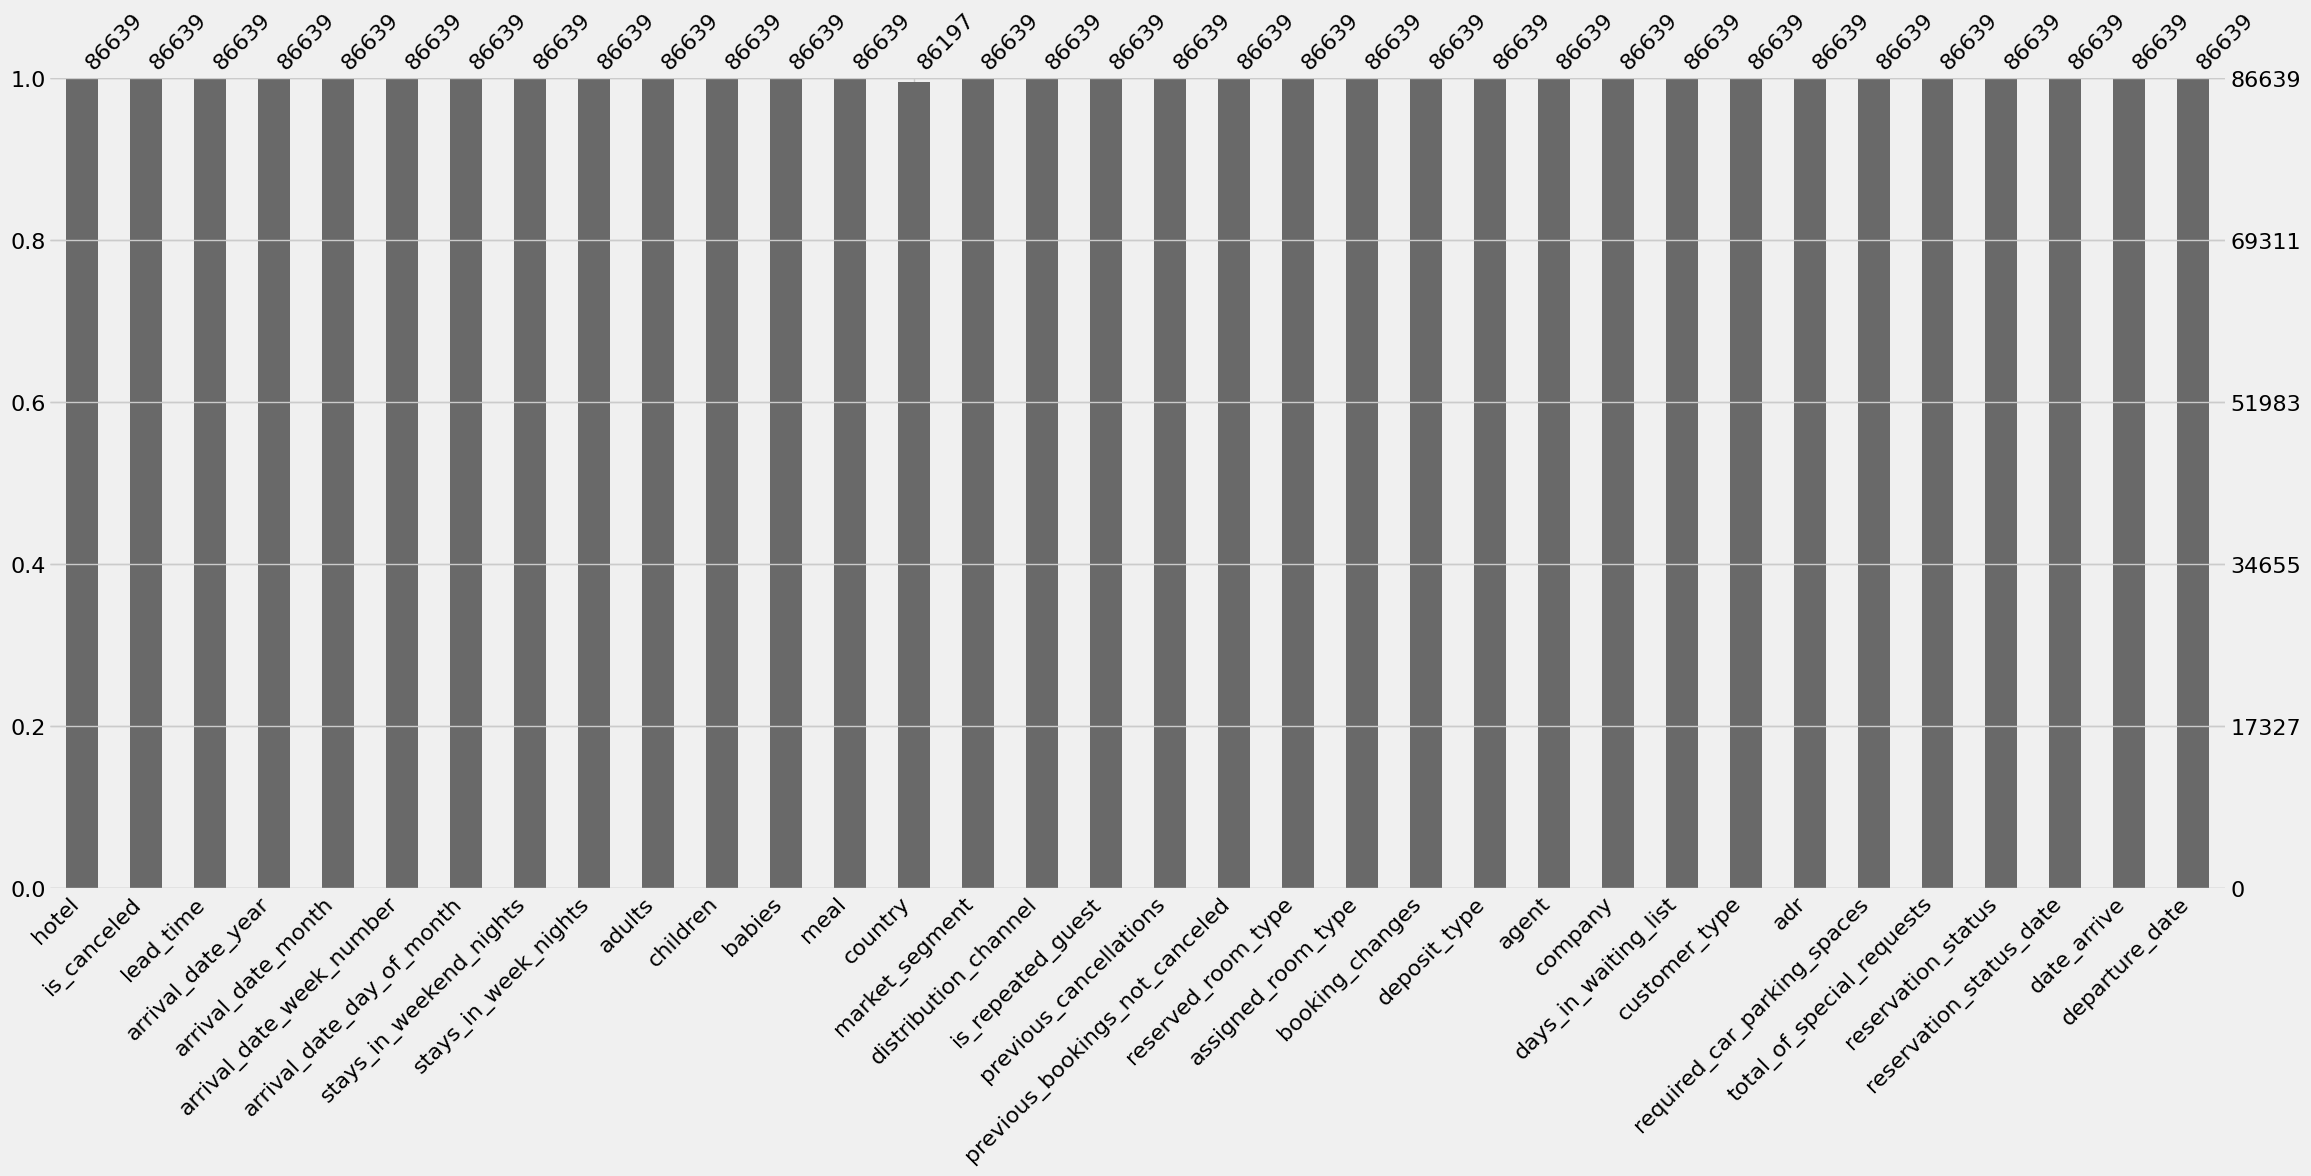

In [68]:
msno.bar(df)
plt.show()

# 3. Statistique descriptive

## 3.1. Nombre d'invités par pays

In [37]:
# Calcul des invités par pays
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         17094
1       GBR          8418
2       FRA          7082
3       ESP          5367
4       DEU          4332
..      ...           ...
161     MAC             1
162     BFA             1
163     DJI             1
164     MMR             1
165     FRO             1

[166 rows x 2 columns]

In [38]:
# Création de la carte
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations=country_wise_guests['country'],color=country_wise_guests['No of guests'], hover_name=country_wise_guests['country'])
guests_map.show()

## 3.2. Nombre d'invités par region

### 3.2.1 Créer le colonne region

In [39]:
countries_regions = {
    'AFG': 'Asia',
    'AGO': 'Africa',
    'ALB': 'Europe',
    'AND': 'Europe',
    'ARE': 'Asia',
    'ARG': 'South America',
    'ARM': 'Asia',
    'ATG': 'North America',
    'AUS': 'Oceania',
    'AUT': 'Europe',
    'AZE': 'Asia',
    'BDI': 'Africa',
    'BEL': 'Europe',
    'BEN': 'Africa',
    'BFA': 'Africa',
    'BGD': 'Asia',
    'BGR': 'Europe',
    'BHR': 'Asia',
    'BHS': 'North America',
    'BIH': 'Europe',
    'BLR': 'Europe',
    'BLZ': 'North America',
    'BOL': 'South America',
    'BRA': 'South America',
    'BRB': 'North America',
    'BRN': 'Asia',
    'BTN': 'Asia',
    'BWA': 'Africa',
    'CAF': 'Africa',
    'CAN': 'North America',
    'CHE': 'Europe',
    'CHL': 'South America',
    'CHN': 'Asia',
    'CIV': 'Africa',
    'CMR': 'Africa',
    'COD': 'Africa',
    'COG': 'Africa',
    'COL': 'South America',
    'COM': 'Africa',
    'CPV': 'Africa',
    'CRI': 'North America',
    'CUB': 'North America',
    'CYP': 'Asia',
    'CZE': 'Europe',
    'DEU': 'Europe',
    'DJI': 'Africa',
    'DNK': 'Europe',
    'DO': 'North America',
    'DOM': 'North America',
    'DZA': 'Africa',
    'ECU': 'South America',
    'EGY': 'Africa',
    'ERI': 'Africa',
    'ESP': 'Europe',
    'EST': 'Europe',
    'ETH': 'Africa',
    'EUZ': 'Europe',
    'FIN': 'Europe',
    'FJI': 'Oceania',
    'FRA': 'Europe',
    'FSM': 'Oceania',
    'FYR': 'Europe',
    'GAB': 'Africa',
    'GBR': 'Europe',
    'GEO': 'Asia',
    'GHA': 'Africa',
    'GIN': 'Africa',
    'GMB': 'Africa',
    'GNB': 'Africa',
    'GNQ': 'Africa',
    'GRC': 'Europe',
    'GRD': 'North America',
    'GTM': 'North America',
    'GUY': 'South America',
    'HND': 'North America',
    'HRV': 'Europe',
    'HTI': 'North America',
    'HUN': 'Europe',
    'IDN': 'Asia',
    'IND': 'Asia',
    'IRL': 'Europe',
    'IRN': 'Asia',
    'IRQ': 'Asia',
    'ISL': 'Europe',
    'ISR': 'Asia',
    'ITA': 'Europe',
    'JAM': 'North America',
    'JOR': 'Asia',
    'JPN': 'Asia',
    'KAZ': 'Asia',
    'KEN': 'Africa',
    'KGZ': 'Asia',
    'KHM': 'Asia',
    'KIR': 'Oceania',
    'KNA': 'North America',
    'KOR': 'Asia',
    'KWT': 'Asia',
    'LAO': 'Asia',
    'LBN': 'Asia',
    'LBR': 'Africa',
    'LBY': 'Africa',
    'LCA': 'North America',
    'LIE': 'Europe',
    'LKA': 'Asia',
    'LSO': 'Africa',
    'LTU': 'Europe',
    'LUX': 'Europe',
    'LVA': 'Europe',
    'MAR': 'Africa',
    'MCO': 'Europe',
    'MDA': 'Europe',
    'MDG': 'Africa',
    'MDV': 'Asia',
    'MEX': 'North America',
    'MHL': 'Oceania',
    'MLI': 'Africa',
    'MLT': 'Europe',
    'MMR': 'Asia',
    'MNG': 'Asia',
    'MNP': 'Oceania',
    'MOZ': 'Africa',
    'MRT': 'Africa',
    'MUS': 'Africa',
    'MWI': 'Africa',
    'MYS': 'Asia',
    'NAM': 'Africa',
    'NER': 'Africa',
    'NGA': 'Africa',
    'NIC': 'North America',
    'NLD': 'Europe',
    'NOR': 'Europe',
    'NPL': 'Asia',
    'NRU': 'Oceania',
    'NZL': 'Oceania',
    'OMN': 'Asia',
    'PAK': 'Asia',
    'PAN': 'North America',
    'PER': 'South America',
    'PHL': 'Asia',
    'PLW': 'Oceania',
    'PNG': 'Oceania',
    'POL': 'Europe',
    'PRI': 'North America',
    'PRK': 'Asia',
    'PRT': 'Europe',
    'PRY': 'South America',
    'QAT': 'Asia',
    'ROU': 'Europe',
    'RUS': 'Europe',
    'RWA': 'Africa',
    'SAU': 'Asia',
    'SCG': 'Europe',
    'SDN': 'Africa',
    'SEN': 'Africa',
    'SGP': 'Asia',
    'SLB': 'Oceania',
    'SLE': 'Africa',
    'SLV': 'North America',
    'SMR': 'Europe',
    'SOM': 'Africa',
    'STP': 'Africa',
    'SUR': 'South America',
    'SVK': 'Europe',
    'SVN': 'Europe',
    'SWE': 'Europe',
    'SWZ': 'Africa',
    'SYC': 'Africa',
    'SYR': 'Asia',
    'TCD': 'Africa',
    'TGO': 'Africa',
    'THA': 'Asia',
    'TJK': 'Asia',
    'TKM': 'Asia',
    'TLS': 'Oceania',
    'TON': 'Oceania',
    'TTO': 'North America',
    'TUN': 'Africa',
    'TUR': 'Europe',
    'TUV': 'Oceania',
    'TWN': 'Asia',
    'TZN': 'Africa',
    'UGA': 'Africa',
    'UKR': 'Europe',
    'URY': 'South America',
    'USA': 'North America',
    'UZB': 'Asia',
    'VAT': 'Europe',
    'VCT': 'North America',
    'VEN': 'South America',
    'VNM': 'Asia',
    'VUT': 'Oceania',
    'WSM': 'Oceania',
    'YEM': 'Asia',
    'ZAF': 'Africa',
    'ZMB': 'Africa',
    'ZWE': 'Africa'
}

df['region'] = df['country'].map(countries_regions)

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
2                        27                          1   
3                        27                          1   
4                        27                          1   
6                        27                          1   
7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   
6   BB     PRT         Direct               Direct                  0   
7   FB     PRT         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
6                       0                               0                  C   
7                       0                               0                  C   

  assigned_room_type  booking_changes deposit_type  agent  company  \
2                  C                0   No Deposit   14.0    169.0   
3                  A                0   No Deposit  304.0    169.0   
4                  A                0   No Deposit  240.0    169.0   
6                  C                0   No Deposit   14.0    169.0   
7                  C                0   No Deposit  303.0    169.0   

   days_in_waiting_list customer_type    adr  required_car_parking_spaces  \
2                     0     Transient   75.0                            0   
3                     0     Transient   75.0                            0   
4                     0     Transient   98.0                            0   
6                     0     Transient  107.0                            0   
7                     0     Transient  103.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   
6                          0          Check-Out              2015-07-03   
7                          1          Check-Out              2015-07-03   

  date_arrive departure_date  region  
2  2015-07-01     2015-07-02  Europe  
3  2015-07-01     2015-07-02  Europe  
4  2015-07-01     2015-07-03  Europe  
6  2015-07-01     2015-07-03  Europe  
7  2015-07-01     2015-07-03  Europe

### 6.2.2 Visualisation des invités par région


In [40]:
region_wise_guests = df[df['is_canceled'] == 0]['region'].value_counts().reset_index()
region_wise_guests.columns = ['region', 'No of guests']

region_wise_guests

region  No of guests
0         Europe         55833
1  South America          1594
2  North America          1538
3           Asia          1412
4         Africa           566
5        Oceania           347

## 3.3. Frequence des Annulations de Réservations


Statistiques descriptives pour la colonne 'is_canceled': 

count    86639.000000
mean         0.276850
std          0.447444
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64 

is_canceled
0    62653
1    23986
Name: count, dtype: int64


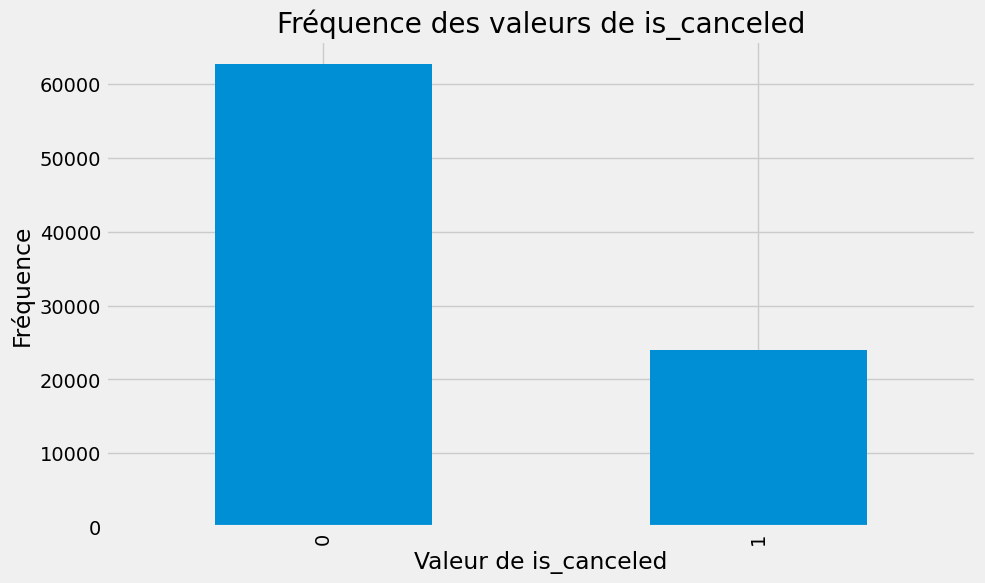

In [41]:
print("\nStatistiques descriptives pour la colonne 'is_canceled': \n")
print(df['is_canceled'].describe(), "\n")

canceled_frequency = df['is_canceled'].value_counts()

print(canceled_frequency)

plt.figure(figsize=(10, 6))
canceled_frequency.plot(kind='bar')

plt.xlabel('Valeur de is_canceled')
plt.ylabel('Fréquence')
plt.title('Fréquence des valeurs de is_canceled')

plt.show()


## 3.4. Nombre des reservations annulées

In [42]:
# Calculer le nombre total d'invités et le nombre d'invités annulés
total_guests = df.shape[0]
canceled_guests = df[df['is_canceled'] == 1].shape[0]

# Créer un diagramme à secteurs
fig = px.pie(values=[total_guests - canceled_guests, canceled_guests],
             names=['Invités non annulés', 'Invités annulés'],
             title='Proportion d\'invités annulés',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## 3.5. Analyse des Réservations Annulées et Non Annulées Par Saison

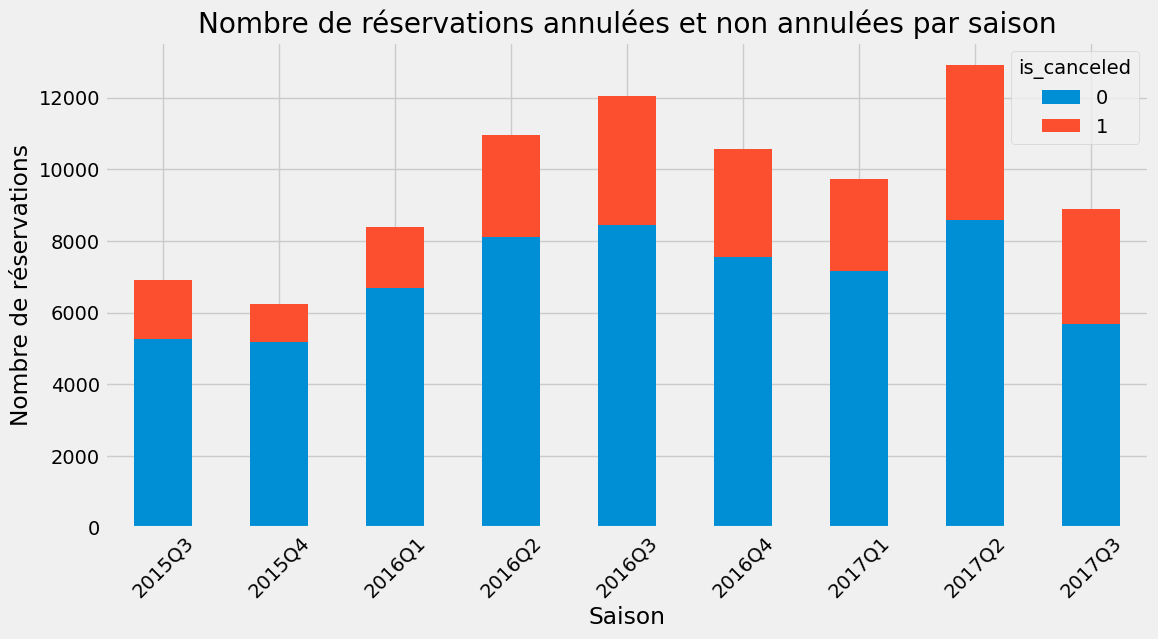

In [43]:
# Convertir la colonne de date en datetime si nécessaire
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# Extraire la saison de la colonne 'date_arrive'
df['season'] = df['date_arrive'].dt.to_period('Q')

# Grouper par 'season' et 'is_canceled', puis compter le nombre de réservations
grouped_data = df.groupby(['season', 'is_canceled']).size().unstack(fill_value=0)

# Créer un diagramme pour visualiser le nombre de réservations annulées et non annulées par saison
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Nombre de réservations annulées et non annulées par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)  # Pour améliorer la lisibilité des labels des saisons
plt.show()

## 3.6. Analyse des Réservations par Type de Client et par saison

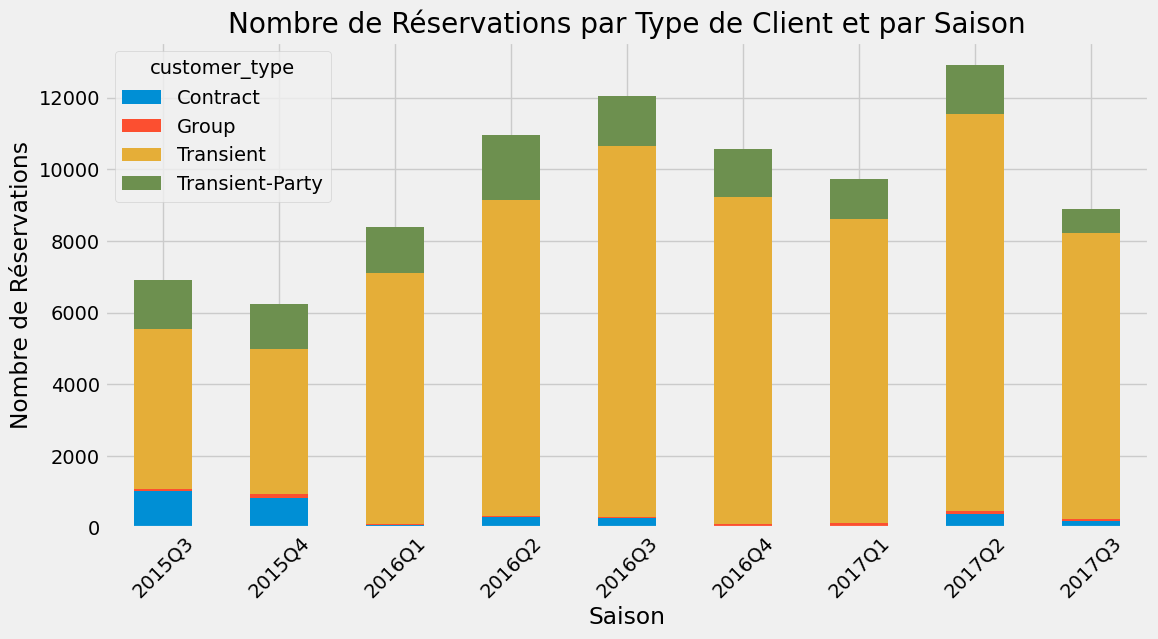

In [44]:
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# Extraire la saison de la colonne 'date_arrive'
df['season'] = df['date_arrive'].dt.to_period('Q')

# Grouper par 'season' et 'customer_type', puis compter le nombre de réservations
grouped_data = df.groupby(['season', 'customer_type']).size().unstack(fill_value=0)

# Créer un diagramme pour visualiser le nombre de réservations par type de client et par saison
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Nombre de Réservations par Type de Client et par Saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de Réservations')
plt.xticks(rotation=45)  # Pour améliorer la lisibilité des labels des saisons
plt.show()

## 3.7. Analyse des Réservations par Type de Client

customer_type
Contract            3119
Group                536
Transient          71366
Transient-Party    11618
dtype: int64 



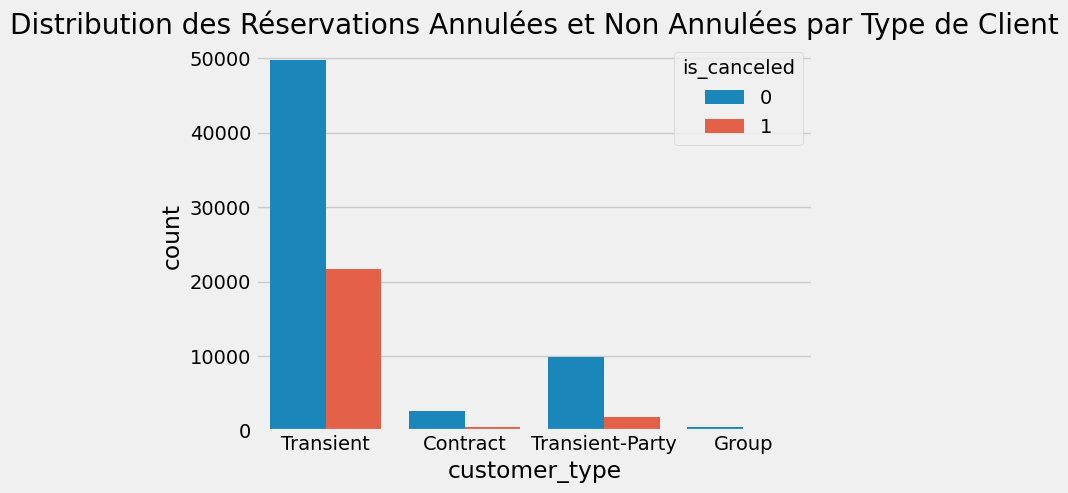

In [45]:
# Calculer le nombre total de réservations pour chaque type de client
reservations_by_customer_type = df.groupby('customer_type').size()

# Afficher les résultats
print(reservations_by_customer_type, "\n")

# Créer un diagramme à barres empilées pour les réservations annulées et non annulées par type de client
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Distribution des Réservations Annulées et Non Annulées par Type de Client')
plt.show()

## 3.8. Fréquence des mois de réservation

In [46]:
# Supposons que df est votre DataFrame existant avec une colonne 'reservation_status_date'
df['date'] = pd.to_datetime(df['reservation_status_date'])
df['month_number'] = df['date'].dt.month  # Extrayez les mois comme des entiers

# Convertissez les mois en chaînes de caractères pour l'affichage
df['month_string'] = df['month_number'].apply(lambda x: f"{x:02d}")  # Formatte les mois comme des chaînes de deux chiffres

# Créez une séquence de mois de 1 à 12
months_sequence = [str(i).zfill(2) for i in range(1, 13)]

# Créez un DataFrame temporaire pour faciliter l'indexation
temp_df = pd.DataFrame({'Month': months_sequence})

# Fusionnez temp_df avec df pour aligner les mois avec leurs fréquences
merged_df = pd.merge(temp_df, df[['month_string', 'month_number']], left_on='Month', right_on='month_string', how='left').fillna(0)

# Calculez la fréquence pour chaque mois
merged_df['Frequency'] = merged_df.groupby('Month')['month_number'].transform('count')

# Élargissez la taille du graphique pour une meilleure lisibilité
plt.figure(figsize=(10, 6))

# Tracez le graphique de barres
merged_df.plot(x='Month', y='Frequency', kind='bar')

plt.xlabel('Mois')
plt.ylabel('Fréquence')
plt.title('Fréquence des années de réservation')

plt.show()


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

## 3.9. Fréquence des Hotels de réservation

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


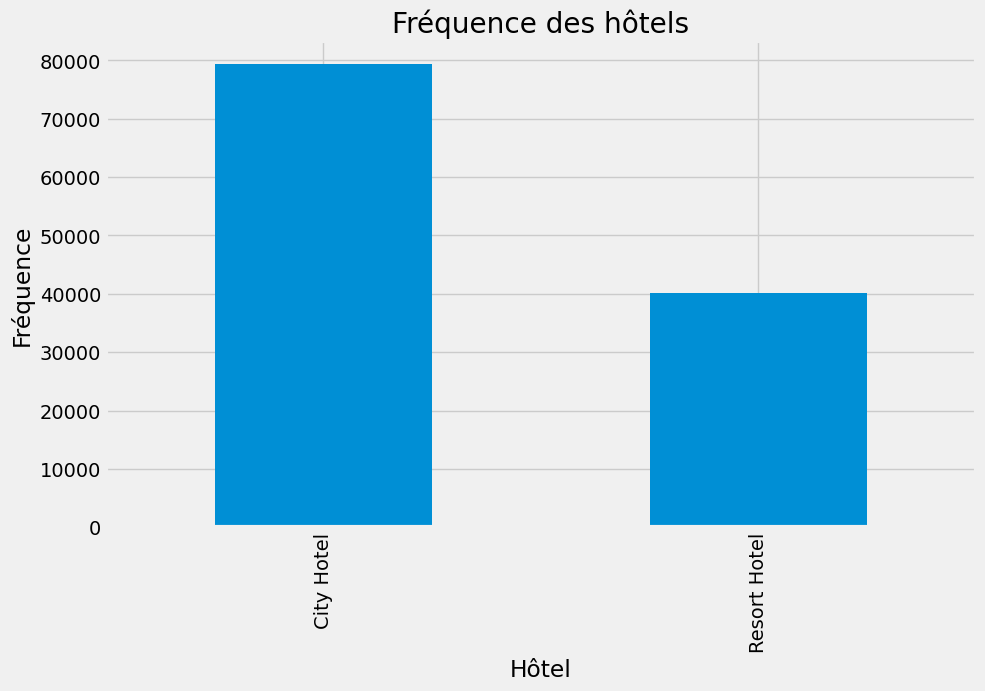

In [ ]:
hotel_frequency = df['hotel'].value_counts()
print(hotel_frequency)

plt.figure(figsize=(10, 6))
hotel_frequency.plot(kind='bar')

plt.xlabel('Hôtel')
plt.ylabel('Fréquence')
plt.title('Fréquence des hôtels')

plt.show()

## 3.10. Analyse Comparative de l'ADR Moyen par Hôtel

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64 



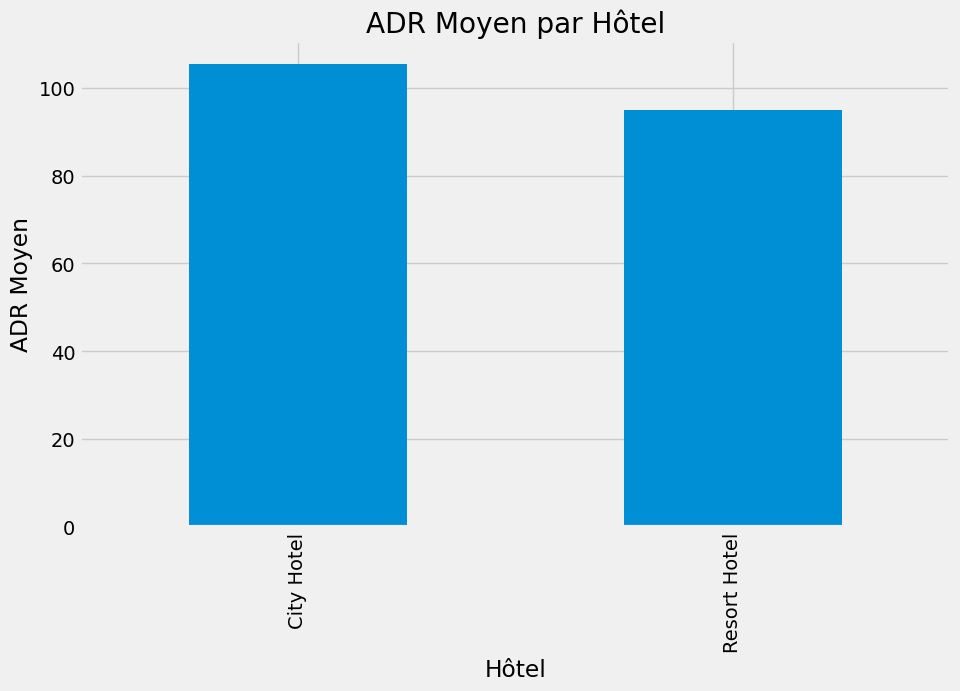

In [ ]:
# Calculer l'ADR "Average Daily Rate" moyen pour chaque hôtel
adr_mean_by_hotel = df.groupby('hotel')['adr'].mean()

# Afficher les résultats
print(adr_mean_by_hotel, "\n")

# Créer un diagramme à barres pour l'ADR par hôtel
adr_mean_by_hotel.plot(kind='bar', figsize=(10, 6))
plt.title('ADR Moyen par Hôtel')
plt.xlabel('Hôtel')
plt.ylabel('ADR Moyen')
plt.show()

#a verifier

# 4. Data Pre Processing

## 4.1. Matrice de correlation

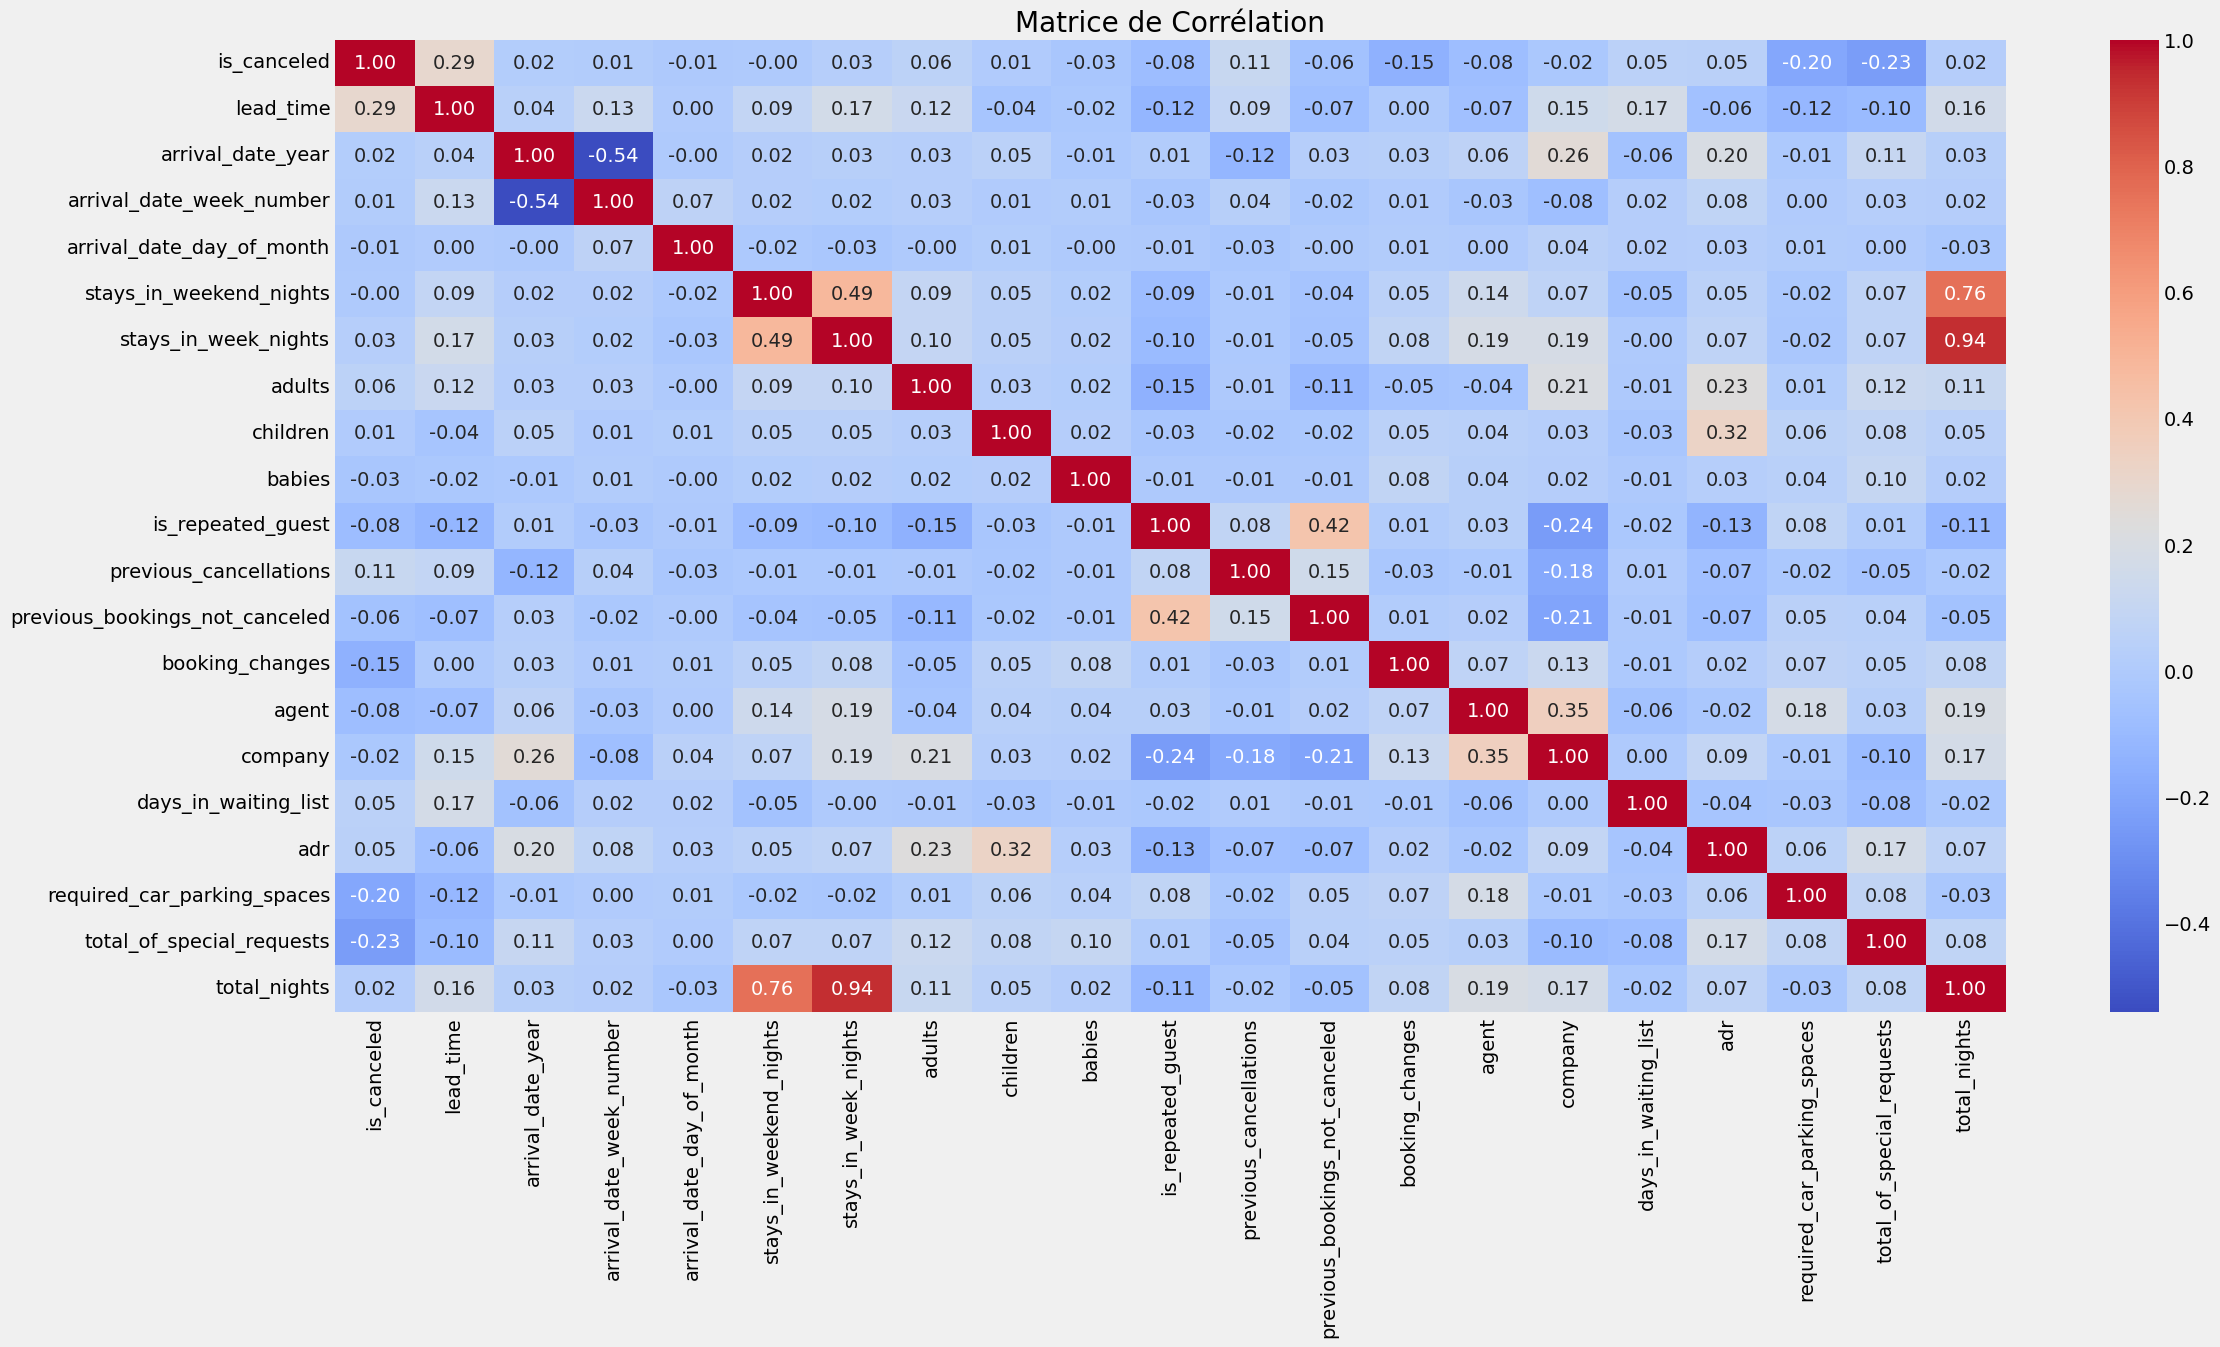

In [38]:
# La matrice de corrélation permet de déterminer les relations linéaires entre les variables,

# Exclure les colonnes non numériques du calcul de corrélation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

## 4.2. Analyse de la Corrélation entre ASP et les Variables Numériques

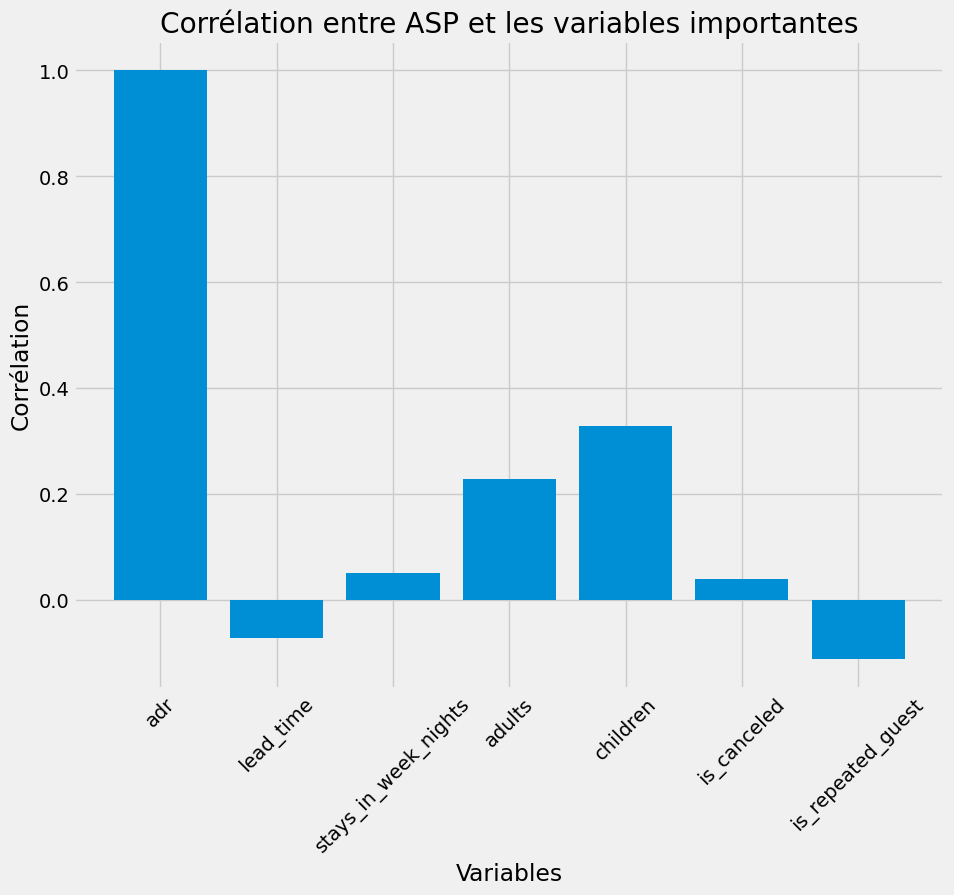

In [ ]:
# Extraire la corrélation entre ASP et les variables importants
asp_correlation = correlation_matrix['adr']

important_columns = ['adr', 'lead_time', 'stays_in_week_nights', 'adults', 'children', 'is_canceled', 'is_repeated_guest']
filtered_important_correlation = asp_correlation[important_columns]

plt.figure(figsize=(10, 8))
plt.bar(filtered_important_correlation.index, filtered_important_correlation.values)
plt.title('Corrélation entre ASP et les variables importantes')
plt.xlabel('Variables')
plt.ylabel('Corrélation')

plt.xticks(rotation=45)

plt.show()

# 5. Analyse des relations de variables

## 5.1. Le nombre de nuits par type d'hôtel

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_13812\2879542065.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




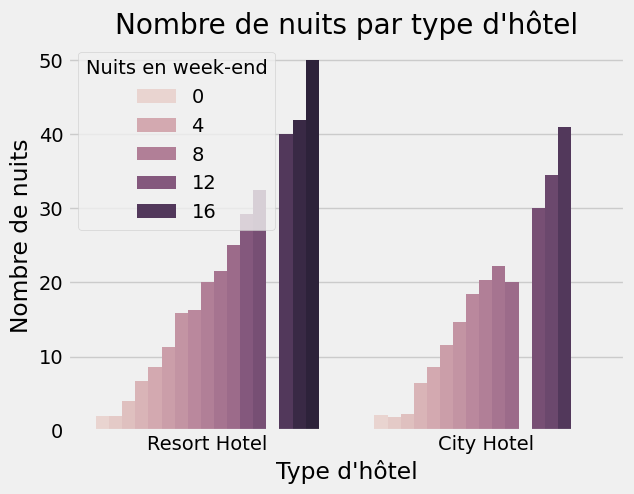

In [ ]:
# Diagramme en barres empilées
sns.barplot(data=df, x='hotel', y='stays_in_week_nights', hue='stays_in_weekend_nights', ci=None)
plt.title('Nombre de nuits par type d\'hôtel')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre de nuits')
plt.legend(title='Nuits en week-end')
plt.show()

## 5.2. Analyse Comparative de l'ADR par Type de Chambre et Hôtel

In [5]:
# Les deux hôtels proposent différents types de chambres et différents arrangements de repas
# Les facteurs saisonniers sont également importants, ce qui entraîne des variations importantes des prix.
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

## 5.3. Analyse comparative entre le prix de nuit de chaque hotel

In [ ]:
!python -m pip install sort-dataframeby-monthorweek

!python -m pip install sorted-months-weekdays

In [3]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]


In [4]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['Month', 'price_for_resort_hotel', 'price_for_city_hotel']

# Fonction pour trier les mois
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final__hotel_prices = sort_month(final_hotel, 'Month')
final__hotel_prices

Month  price_for_resort_hotel  price_for_city_hotel
0     January               48.708919             82.160634
1    February               54.147478             86.183025
2       March               57.012487             90.170722
3       April               75.867816            111.856824
4         May               76.657558            120.445842
5        June              107.921869            117.702075
6        July              150.122528            115.563810
7      August              181.205892            118.412083
8   September               96.416860            112.598452
9     October               61.727505            101.745956
10   November               48.681640             86.500456
11   December               68.322236             87.856764

In [5]:
plt.figure(figsize = (17, 8))

px.line(final__hotel_prices, x = 'Month', y = ['price_for_resort_hotel','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

## Conclusion : 
### Ce graphique montre clairement que les prix des Hotels Resort sont beaucoup plus élevés pendant l'été et que les prix des city Hotels varient moins et sont les plus chers au printemps et en automne.

## 5.3. Analyse comparative entre le nombre des clients de chaque hotel par mois

In [25]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']

final_guests_month = resort_guests.merge(city_guests,on='month')
final_guests_month.columns=['month','no of guests in resort hotel','no of guest in city hotel']
final_guests_month = sort_month(final_guests_month,'month')

final_guests_month

month  no of guests in resort hotel  no of guest in city hotel
0     January                          1868                       2254
1    February                          2308                       3064
2       March                          2573                       4072
3       April                          2550                       4015
4         May                          2535                       4579
5        June                          2038                       4366
6        July                          3137                       4782
7      August                          3257                       5381
8   September                          2102                       4290
9     October                          2577                       4337
10   November                          1976                       2696
11   December                          2017                       2392

In [27]:
px.line(final_guests_month, x = 'month', y = ['no of guests in resort hotel','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

## 5.4. Analyse comparative entre le prix de nuit par saison et type de chambre de chaque hotel

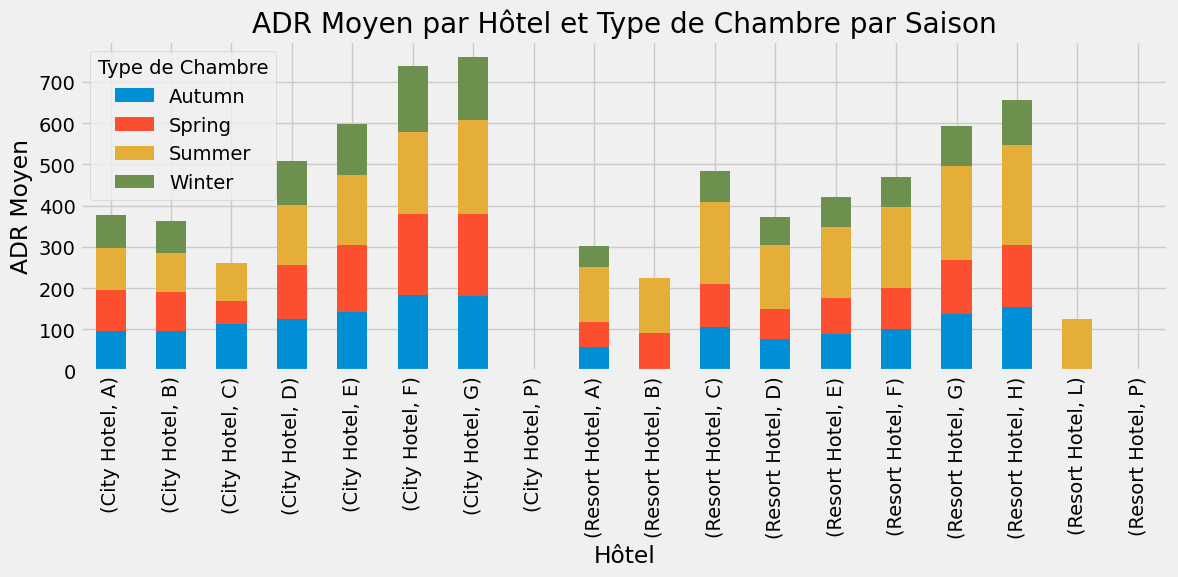

In [9]:
# Regroupement par hôtel, type de chambre et saison, puis calcul de l'ADR moyen
adr_mean_by_hotel_chamber_season = df.groupby(['hotel', 'reserved_room_type', 'season'])['adr'].mean()

adr_mean_by_hotel_chamber_season.unstack(level=-1).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('ADR Moyen par Hôtel et Type de Chambre par Saison')
plt.xlabel('Hôtel')
plt.ylabel('ADR Moyen')
plt.xticks(rotation=90) 
plt.legend(title='Type de Chambre')
plt.tight_layout()
plt.show()

## Remarque : ##
### les hôtels ont différents types de chambres et arrangements de repas, ainsi que des facteurs saisonniers importants qui influencent les prix. Cela signifie que l'ADR moyen peut varier significativement en fonction du type de chambre et de l'époque de l'année, ce qui pourrait expliquer pourquoi l'ADR moyen global pour un hôtel peut être plus faible que celui de l'autre.

## 5.5. Analyse de la Distribution des Nuits Passées par Type d'Hôtel

### 5.3.1. Supprimer les lignes où les Nuits Passée > 40


In [32]:
# addition des nmbre des nuit passer au weekend et au autre jour du semaine
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Supprimer les lignes où les Nuits Passée > 40
df = df.loc[df['total_nights'] <= 40]

In [33]:
stay = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_nights         hotel  Number of stays
0              0    City Hotel              331
1              0  Resort Hotel              384
2              1    City Hotel            13272
3              1  Resort Hotel             7748
4              2    City Hotel            21426
..           ...           ...              ...
61            33    City Hotel                2
62            33  Resort Hotel                1
63            34    City Hotel                1
64            35  Resort Hotel                5
65            38  Resort Hotel                1

[66 rows x 3 columns]

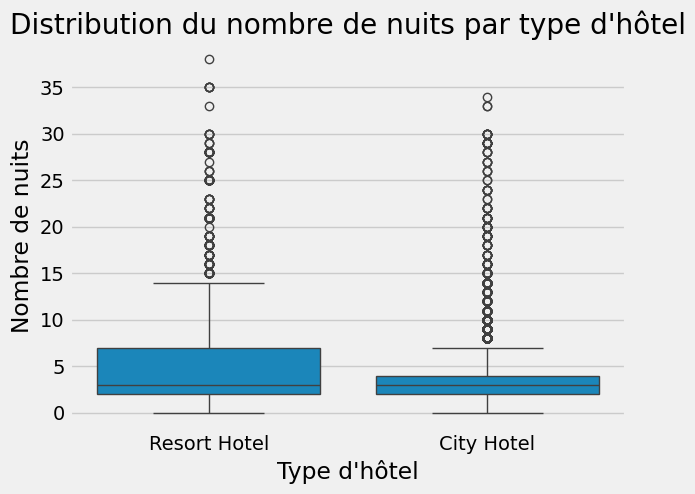

In [35]:
# Diagramme en boîte et moustaches
sns.boxplot(data=df, x='hotel', y='total_nights')
plt.title('Distribution du nombre de nuits par type d\'hôtel')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre de nuits')
plt.show()

In [36]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

## 5.6. Nombre de nuits par type de client

C:\Users\Mossab Weda\AppData\Local\Temp\ipykernel_11404\3281054553.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




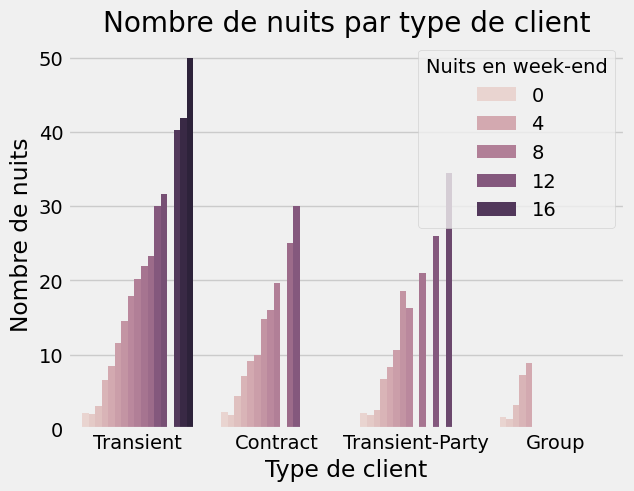

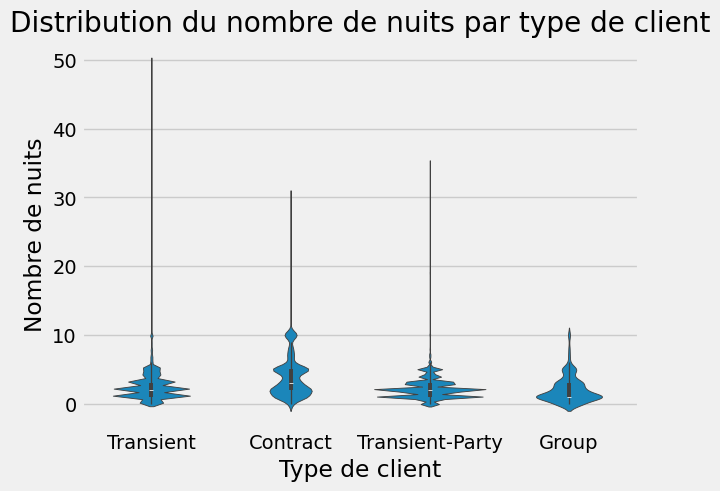

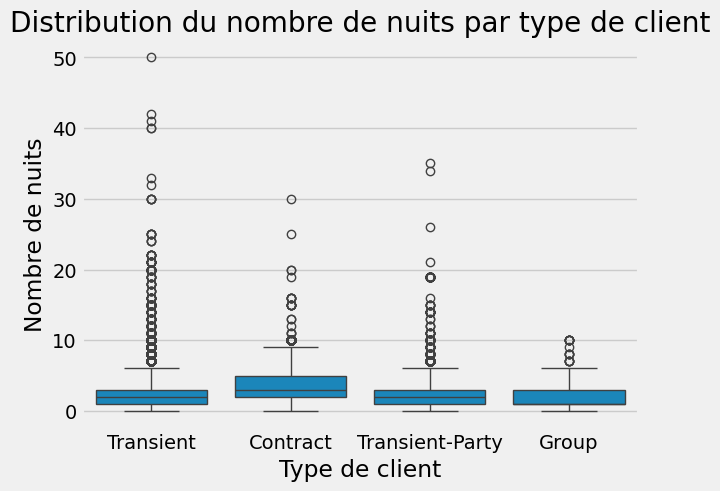

In [16]:
# Diagramme en barres empilées
sns.barplot(data=df, x='customer_type', y='stays_in_week_nights', hue='stays_in_weekend_nights', ci=None)
plt.title('Nombre de nuits par type de client')
plt.xlabel('Type de client')
plt.ylabel('Nombre de nuits')
plt.legend(title='Nuits en week-end')
plt.show()

# Diagramme en violon
sns.violinplot(data=df, x='customer_type', y='stays_in_week_nights')
plt.title('Distribution du nombre de nuits par type de client')
plt.xlabel('Type de client')
plt.ylabel('Nombre de nuits')
plt.show()

# Diagramme en boîte et moustaches
sns.boxplot(data=df, x='customer_type', y='stays_in_week_nights')
plt.title('Distribution du nombre de nuits par type de client')
plt.xlabel('Type de client')
plt.ylabel('Nombre de nuits')
plt.show()

# 6. Analyse croisée

## 6.1. Analyse croisée entre le type d'hôtel et le type de client

Analyse croisée entre le type d'hôtel et le type de client (nombre total de nuits en semaine):
customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         4838    536     133647            34153
Resort Hotel      10859    651      91132            22695


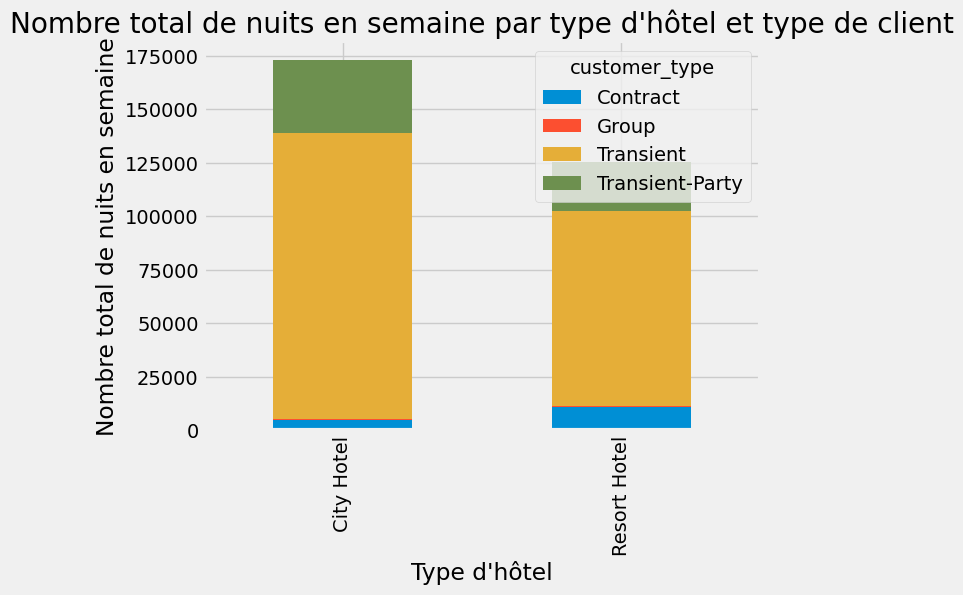

In [5]:
# Effectuer une analyse croisée entre le type d'hôtel et le type de client
cross_tab = pd.crosstab(index=df['hotel'], columns=df['customer_type'], values=df['stays_in_week_nights'], aggfunc='sum')

# Afficher la table croisée
print("Analyse croisée entre le type d'hôtel et le type de client (nombre total de nuits en semaine):")
print(cross_tab)

# Afficher le diagramme en barres empilées
cross_tab.plot(kind='bar', stacked=True)
plt.title('Nombre total de nuits en semaine par type d\'hôtel et type de client')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre total de nuits en semaine')
plt.show()

In [6]:
# les valeurs uniques de la colonne 'customer_type'
customer_types = df['customer_type'].unique()
print("les valeurs uniques de la colonne 'customer_type':\n",customer_types)

les valeurs uniques de la colonne 'customer_type':
 ['Transient' 'Contract' 'Transient-Party' 'Group']


## 6.2. Analyse croisée entre le type d'hôtel et la region

In [67]:
# Effectuer une analyse croisée entre le type d'hôtel et le pays
cross_tab_RegHotel = pd.crosstab(index=df['region'], columns=df['hotel'])

# Afficher la table croisée
print("Analyse croisée entre le type d'hôtel et le pays :")
print(cross_tab_RegHotel)

Analyse croisée entre le type d'hôtel et le pays :
hotel          City Hotel  Resort Hotel
region                                 
Africa                929           173
Asia                 2538           355
Europe              70436         36804
North America        1754           507
Oceania               400           103
South America        2165           537


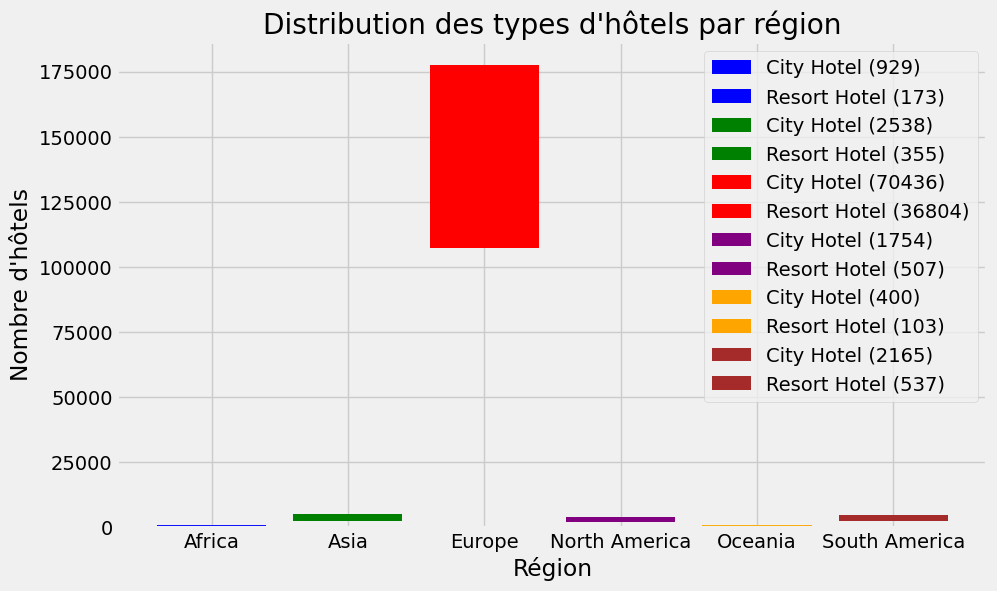

In [72]:
grouped = df.groupby(['region', 'hotel']).size().reset_index(name='counts')

# Créer un diagramme à barres empilées pour chaque région
fig, ax = plt.subplots(figsize=(10, 6))

# Définir les couleurs pour les barres
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Parcourir chaque région unique
for i, region in enumerate(grouped['region'].unique()):
    region_data = grouped[grouped['region'] == region]
    for hotel, count in region_data[['hotel', 'counts']].values:
        ax.bar(i, count, bottom=np.sum(region_data['counts'][:i]), color=colors[i % len(colors)], label=f'{hotel} ({count})')

# Configurer les axes et les titres
ax.set_title('Distribution des types d\'hôtels par région')
ax.set_xlabel('Région')
ax.set_ylabel('Nombre d\'hôtels')
ax.set_xticks(range(len(grouped['region'].unique())))
ax.set_xticklabels(grouped['region'].unique())  # Utiliser les noms des régions comme étiquettes sur l'axe des x
ax.legend()

plt.show()

## 6.3. Analyse croisée des Réservations par Hôtel et Pays

In [75]:
# Calcul du nombre de réservations par hôtel et par pays
reservations_by_hotel_region = df.groupby(['hotel', 'region']).size().reset_index(name='reservation_count')

# Affichage du résultat
print(reservations_by_hotel_region)

           hotel         region  reservation_count
0     City Hotel         Africa                929
1     City Hotel           Asia               2538
2     City Hotel         Europe              70436
3     City Hotel  North America               1754
4     City Hotel        Oceania                400
5     City Hotel  South America               2165
6   Resort Hotel         Africa                173
7   Resort Hotel           Asia                355
8   Resort Hotel         Europe              36804
9   Resort Hotel  North America                507
10  Resort Hotel        Oceania                103
11  Resort Hotel  South America                537


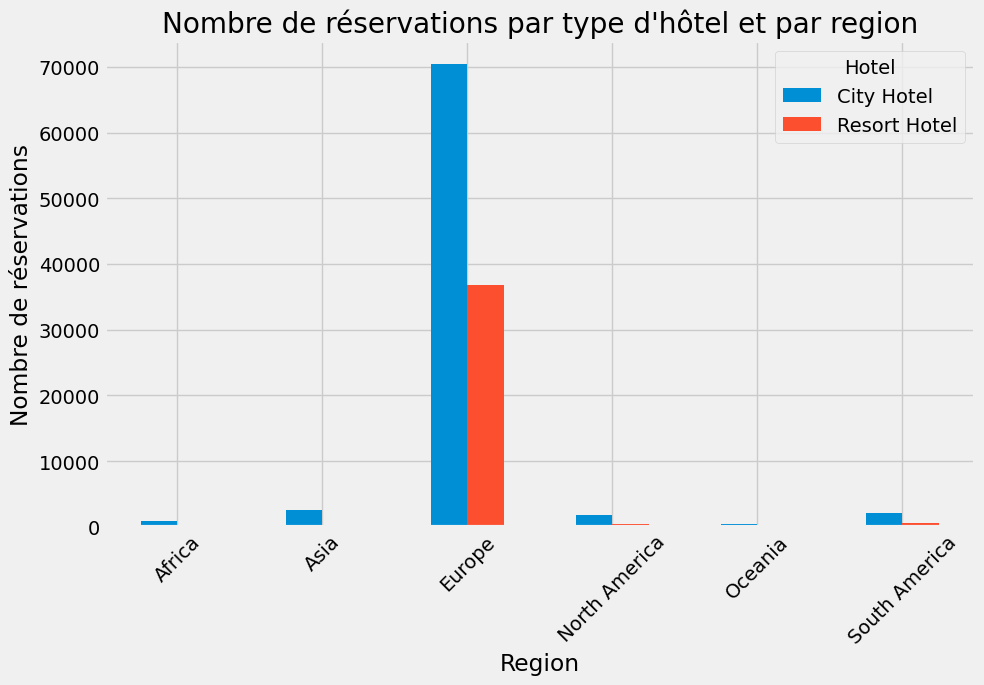

In [77]:
# Diagramme en barres groupées
cross_tab_RegHotel.plot(kind='bar', figsize=(10, 6))
plt.title('Nombre de réservations par type d\'hôtel et par region')
plt.xlabel('Region')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.show()

## 6.4. Analyse croisée de la distribution des Dates d'Arrivée et de Départ par Hôtel et Année

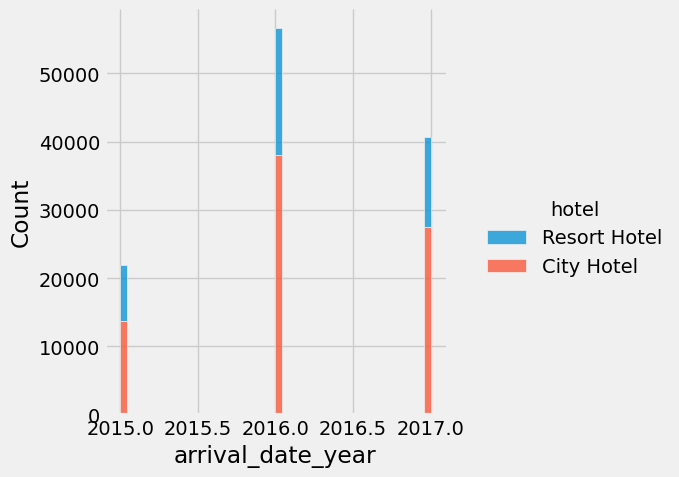

In [28]:
# Histogramme : type d'hôtel en fonction de l'année
g = sns.displot(data=df, x="arrival_date_year", hue="hotel", kind="hist", multiple="stack")

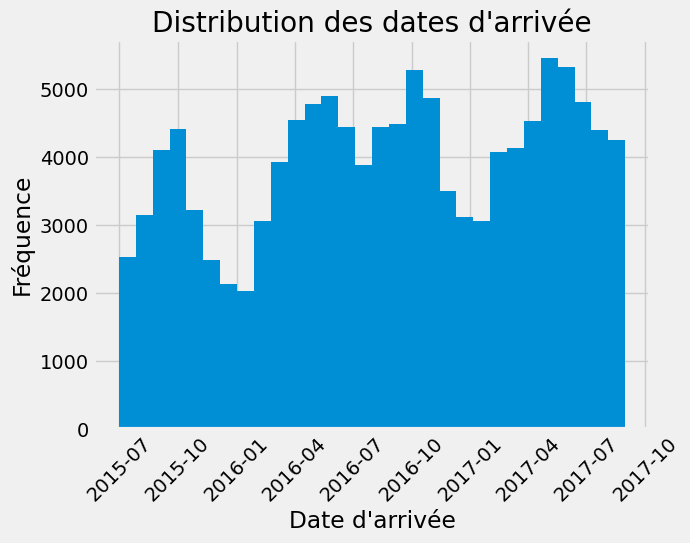

In [44]:
# Créer un histogramme pour la colonne date_arrive
df['date_arrive'].hist(bins=30)
plt.xlabel('Date d\'arrivée')
plt.ylabel('Fréquence')
plt.title('Distribution des dates d\'arrivée')
plt.xticks(rotation=45)

plt.show()

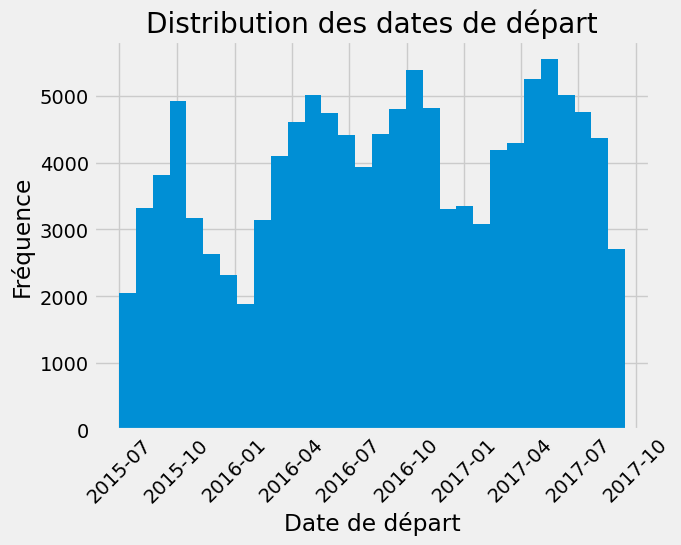

In [43]:
# Créer un histogramme pour la colonne departure_date
df['departure_date'].hist(bins=30)
plt.xlabel('Date de départ')
plt.ylabel('Fréquence')
plt.title('Distribution des dates de départ')
plt.xticks(rotation=45)

plt.show()

# 7. Data Preprocessing

## 7.1. Suppression des colonnes inutiles

In [70]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'booking_changes','reservation_status', 'country']

df.drop(useless_col, axis = 1, inplace = True)

## 7.2. Creation des Dataframes numerique et catégorielle

In [72]:
categ_cols = [col for col in df.columns if df[col].dtype == 'O']
categ_cols


['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [75]:
categ_df = df[categ_cols]
categ_df

hotel arrival_date_month meal market_segment  \
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
6       Resort Hotel               July   BB         Direct   
7       Resort Hotel               July   FB         Direct   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  \
2                    Direct                  A   No Deposit     Transient   
3                 Corporate                  A   No Deposit     Transient   
4                     TA/TO                  A   No Deposit     Transient   
6                    Direct                  C   No Deposit     Transient   
7                    Direct                  C   No Deposit     Transient   
...                     ...                ...          ...           ...   
119385                TA/TO                  A   No Deposit     Transient   
119386                TA/TO                  E   No Deposit     Transient   
119387                TA/TO                  D   No Deposit     Transient   
119388                TA/TO                  A   No Deposit     Transient   
119389                TA/TO                  A   No Deposit     Transient   

       reservation_status_date  
2                   2015-07-02  
3                   2015-07-02  
4                   2015-07-03  
6                   2015-07-03  
7                   2015-07-03  
...                        ...  
119385              2017-09-06  
119386              2017-09-07  
119387              2017-09-07  
119388              2017-09-07  
119389              2017-09-07  

[86639 rows x 9 columns]

In [73]:
numeric_df = df.drop(columns = categ_cols, axis = 1)
numeric_df.drop('is_canceled', axis = 1, inplace = True)
numeric_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
6               0                        27                          1   
7               9                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
6                             0                     2       2       0.0   
7                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
6            0                  0                       0   
7            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  agent  company     adr  \
2                                    0   14.0    169.0   75.00   
3                                    0  304.0    169.0   75.00   
4                                    0  240.0    169.0   98.00   
6                                    0   14.0    169.0  107.00   
7                                    0  303.0    169.0  103.00   
...                                ...    ...      ...     ...   
119385                               0  394.0    169.0   96.14   
119386                               0    9.0    169.0  225.43   
119387                               0    9.0    169.0  157.71   
119388                               0   89.0    169.0  104.40   
119389                               0    9.0    169.0  151.20   

        required_car_parking_spaces  total_of_special_requests date_arrive  \
2                                 0                          0  2015-07-01   
3                                 0                          0  2015-07-01   
4                                 0                          1  2015-07-01   
6                                 0                          0  2015-07-01   
7                                 0                          1  2015-07-01   
...                             ...                        ...         ...   
119385                            0                          0  2017-08-30   
119386                            0                          2  2017

In [76]:
X = pd.concat([categ_df, numeric_df], axis = 1)
y = df['is_canceled']

In [77]:
X.shape, y.shape

((86639, 27), (86639,))

## 7.3. Decomposer le data set en training set et test set

In [79]:
# 30% Test 70% Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [80]:
X_train

hotel arrival_date_month meal market_segment  \
16468   Resort Hotel             August   BB      Online TA   
114630    City Hotel               June   SC      Online TA   
92189     City Hotel               June   SC      Online TA   
113542    City Hotel               June   SC      Online TA   
14042   Resort Hotel                May   BB      Corporate   
...              ...                ...  ...            ...   
84785     City Hotel           November   BB      Corporate   
100717    City Hotel            October   SC      Online TA   
64626     City Hotel              March   BB      Online TA   
55273     City Hotel             August   BB      Online TA   
36502   Resort Hotel                May   BB  Offline TA/TO   

       distribution_channel reserved_room_type deposit_type    customer_type  \
16468                 TA/TO                  A   No Deposit        Transient   
114630                TA/TO                  A   No Deposit        Transient   
92189                 TA/TO                  A   No Deposit        Transient   
113542                TA/TO                  A   No Deposit        Transient   
14042             Corporate                  A   No Deposit  Transient-Party   
...                     ...                ...          ...              ...   
84785             Corporate                  A   No Deposit        Transient   
100717                TA/TO                  A   No Deposit        Transient   
64626                 TA/TO                  D   No Deposit        Transient   
55273                 TA/TO                  A   No Deposit        Transient   
36502                 TA/TO                  D   No Deposit         Contract   

       reservation_status_date  lead_time  arrival_date_week_number  \
16468               2015-08-30         56                        35   
114630              2017-06-25        219                        25   
92189               2016-07-02        126                        27   
113542              2017-06-09        218                        23   
14042               2016-06-01          5                        23   
...                        ...        ...                       ...   
84785               2016-11-17          7                        47   
100717              2016-11-01         27                        44   
64626               2017-01-29         95                        11   
55273               2016-04-08        133                        33   
36502               2017-05-23        200                        20   

        arrival_date_day_of_month  stays_in_weekend_nights  \
16468                          25                        0   
114630                         20                        0   
92189                          26                        2   
113542                          7                        0   
14042                          30                        1   
...                           ...                      ...   
84785                          16                        0   
100717                         29                        2   
64626                          13                        2   
55273                           9                        0   
36502                          16                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
16468                      5       2       0.0       0                  0   
114630                     5       1       0.0       0                  0   
92189                      4       2       0.0       0                  0   
113542                     2       2       0.0       0                  0   
14042                      1       1       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
84785                      1       1       0.0       0                  1   
100717                     1       2       0.0       0                  0   
64626 

In [82]:
X_test

hotel arrival_date_month meal market_segment  \
47379     City Hotel           February   BB      Online TA   
10821   Resort Hotel              April   BB      Online TA   
43147     City Hotel          September   BB         Direct   
56167     City Hotel             August   BB      Online TA   
67554     City Hotel                May   BB      Online TA   
...              ...                ...  ...            ...   
116844    City Hotel               July   BB      Online TA   
35641   Resort Hotel              April   BB         Direct   
36328   Resort Hotel                May   BB      Online TA   
80838     City Hotel           December   BB         Direct   
24840   Resort Hotel                May   BB      Online TA   

       distribution_channel reserved_room_type deposit_type    customer_type  \
47379                 TA/TO                  D   No Deposit        Transient   
10821                 TA/TO                  A   No Deposit        Transient   
43147                Direct                  A   No Deposit        Transient   
56167                 TA/TO                  A   No Deposit        Transient   
67554                 TA/TO                  F   No Deposit        Transient   
...                     ...                ...          ...              ...   
116844                TA/TO                  A   No Deposit  Transient-Party   
35641                Direct                  A   No Deposit        Transient   
36328                 TA/TO                  A   No Deposit        Transient   
80838                Direct                  A   No Deposit  Transient-Party   
24840                 TA/TO                  A   No Deposit        Transient   

       reservation_status_date  lead_time  arrival_date_week_number  \
47379               2016-02-21         43                         8   
10821               2017-03-03        180                        14   
43147               2015-09-20         20                        38   
56167               2016-08-25         20                        36   
67554               2017-03-31         39                        18   
...                        ...        ...                       ...   
116844              2017-07-26         55                        30   
35641               2017-04-29          0                        17   
36328               2017-05-17          5                        19   
80838               2015-11-26         54                        49   
24840               2016-06-05        156                        23   

        arrival_date_day_of_month  stays_in_weekend_nights  \
47379                          18                        0   
10821                           6                        1   
43147                          15                        0   
56167                          31                        0   
67554                           4                        0   
...                           ...                      ...   
116844                         24                        1   
35641                          27                        0   
36328                          13                        2   
80838                           1                        0   
24840                          30                        1   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
47379                      3       2       0.0       0                  0   
10821                      3       1       0.0       0                  0   
43147                      5       2       0.0       0                  0   
56167                      2       2       0.0       0                  0   
67554                      3       2       2.0       0                  0   
...                      ...     ...       ...     ...                ...   
116844                     1       2       1.0       0                  0   
35641                      2       2       0.0       0                  0   
36328 

In [81]:
y_train

16468     0
114630    0
92189     0
113542    0
14042     0
         ..
84785     0
100717    0
64626     1
55273     1
36502     0
Name: is_canceled, Length: 60647, dtype: int64

In [83]:
y_test

47379     0
10821     1
43147     0
56167     1
67554     1
         ..
116844    0
35641     0
36328     0
80838     1
24840     0
Name: is_canceled, Length: 25992, dtype: int64